In [1]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

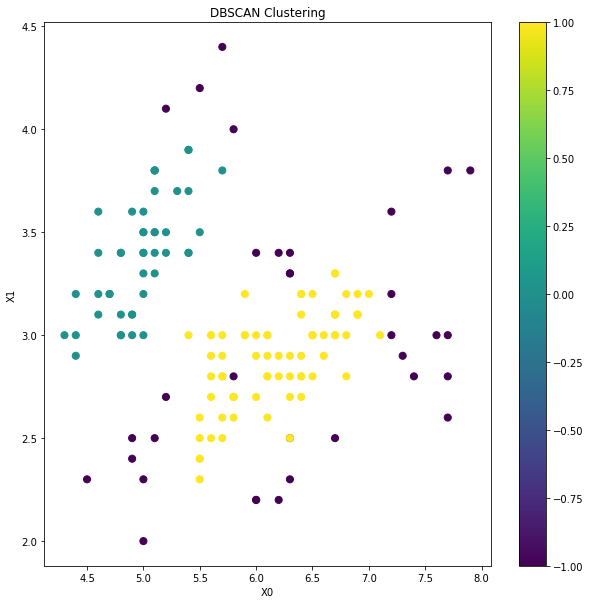

In [2]:
iris = datasets.load_iris()
X = iris.data
data = pd.DataFrame(X)
std_slc = StandardScaler()
X_std = std_slc.fit_transform(X)
clt = DBSCAN()
model = clt.fit(X_std)
clusters = pd.DataFrame(model.fit_predict(X_std))
data["Cluster"] = clusters
fig = plt.figure(figsize=(10,10)); ax = fig.add_subplot(111)
scatter = ax.scatter(data[0],data[1], c=data["Cluster"],s=50)
ax.set_title("DBSCAN Clustering")
ax.set_xlabel("X0")
ax.set_ylabel("X1")
plt.colorbar(scatter)
plt.show()

In [3]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import statsmodels.stats.api as sms
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil

In [4]:
effect_size = sms.proportion_effectsize(0.13, 0.15)
required_n = sms.NormalIndPower().solve_power(effect_size, power=0.8, alpha=0.05, ratio=1)                                                  
required_n = ceil(required_n)
print(required_n)

4720


In [5]:
raw_data = pd.read_csv('ab_data.csv')
print(raw_data.head())
session_counts = raw_data['user_id'].value_counts(ascending=False)
multi_users = session_counts[session_counts > 1].count()
print(multi_users)
users_to_drop = session_counts[session_counts > 1].index
raw_data = raw_data[~raw_data['user_id'].isin(users_to_drop)]

   user_id                   timestamp      group landing_page  converted
0   851104  2017-01-21 22:11:48.556739    control     old_page          0
1   804228  2017-01-12 08:01:45.159739    control     old_page          0
2   661590  2017-01-11 16:55:06.154213  treatment     new_page          0
3   853541  2017-01-08 18:28:03.143765  treatment     new_page          0
4   864975  2017-01-21 01:52:26.210827    control     old_page          1
3894


In [6]:
control_sample = raw_data[raw_data['group'] == 'control'].sample(n=required_n, random_state=22)
treatment_sample = raw_data[raw_data['group'] == 'treatment'].sample(n=required_n, random_state=22)
ab_test = pd.concat([control_sample, treatment_sample], axis=0)
ab_test.reset_index(drop=True, inplace=True)
print(ab_test)
print(ab_test.info())
print(ab_test['group'].value_counts())

      user_id                   timestamp      group landing_page  converted
0      763854  2017-01-21 03:43:17.188315    control     old_page          0
1      690555  2017-01-18 06:38:13.079449    control     old_page          0
2      861520  2017-01-06 21:13:40.044766    control     old_page          0
3      630778  2017-01-05 16:42:36.995204    control     old_page          0
4      656634  2017-01-04 15:31:21.676130    control     old_page          0
...       ...                         ...        ...          ...        ...
9435   908512  2017-01-14 22:02:29.922674  treatment     new_page          0
9436   873211  2017-01-05 00:57:16.167151  treatment     new_page          0
9437   631276  2017-01-20 18:56:58.167809  treatment     new_page          0
9438   662301  2017-01-03 08:10:57.768806  treatment     new_page          0
9439   944623  2017-01-19 10:56:01.648653  treatment     new_page          1

[9440 rows x 5 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9

           conversion_rate  deviation     error
group                                          
control           0.123305   0.328787  0.004786
treatment         0.125636   0.331438  0.004824


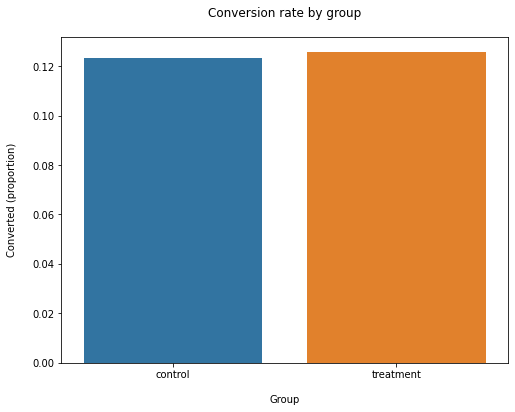

In [7]:
conversion_rates = ab_test.groupby('group')['converted']
a = lambda x: np.std(x, ddof=0)
b = lambda x: stats.sem(x, ddof=0)            
conversion_rates = conversion_rates.agg([np.mean, a, b])
conversion_rates.columns = ['conversion_rate', 'deviation', 'error']
print(conversion_rates)
plt.figure(figsize=(8,6))
sns.barplot(x=ab_test['group'], y=ab_test['converted'], ci=False)
plt.title('Conversion rate by group', pad=20)
plt.xlabel('Group', labelpad=15)
plt.ylabel('Converted (proportion)', labelpad=15)
plt.show()